<a href="https://colab.research.google.com/github/cabralana/intro_AED_data_science/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**ALURA - FORMAÇÃO DATA SCIENCE: ANÁLISE E VISUALIZAÇÃO DE DADOS**



1.   Dados e visualizações
2.   Análise exploratória
3.   Variáveis
4.   Data viz
5.   Dados e estatística



##**Analisando as notas em geral:**

In [81]:
# importando a biblioteca pandas e apelidando de pd
import pandas as pd

#dataframe
notas = pd.read_csv("ratings.csv")

# retornando 5 linhas não específicas com head()
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [82]:
# atributo que permite obter quantas linhas e colunas de dados existe - shape()
notas.shape       

(100836, 4)

In [83]:
# renomeando as colunas
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [84]:
# retornando uma lista de elementos únicos - unique()
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [85]:
# retornando o número de ocorrência de cada nota na série - value_counts()
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [86]:
# contando quantas notas - count()
notas['nota'].count()

100836

In [87]:
# a média das notas - mean()
notas['nota'].mean()

3.501556983616962

In [88]:
notas.nota.head

<bound method NDFrame.head of 0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64>

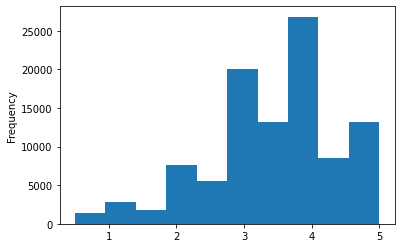

In [89]:
# histograma - intervalo entre as classes  
notas.nota.plot(kind='hist')

In [90]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [91]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

##**BOXPLOT**

- a mediana das notas está entre 3 e 4, podendo ser 3,5. 
- 25% das notas está entre 4 e 5.
- 25% das notas está entre 1 e 3.
- outliers: notas de 1 para 0.5. 

In [92]:
# importando a biblioteca seaborn para utilizar o boxplot 
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


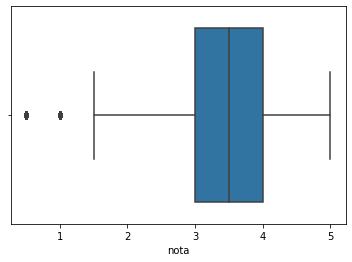

In [ ]:
sns.boxplot(notas.nota)

Arquivo CSV filmes

In [9]:
# importando arquivo filmes csv - dataframe
filmes = pd.read_csv('movies.csv')
# retornando 5 linhas não específicas com head()
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
#renomeando as colunas de filmes
filmes.columns = ["filmeID", "titulo", "genero"]

#olhando os filmes
filmes.head()

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##**Analisando algumas notas médias específicas por filme:**

In [ ]:
notas.query("filmeID==1").nota.mean()

3.9209302325581397

In [ ]:
notas.query("filmeID==2").nota.mean()

3.4318181818181817

In [53]:
medias_por_filme = notas.groupby("filmeID").mean()['nota']

In [54]:
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

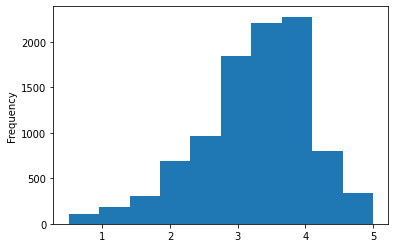

In [55]:
medias_por_filme.plot(kind='hist') #histograma

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


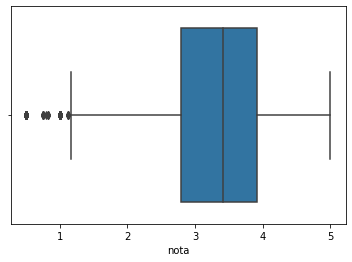

In [56]:
sns.boxplot(medias_por_filme)

In [57]:
# descrevendo o boxplot, com a média e a mediana 
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


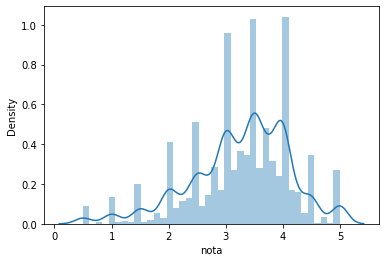

In [58]:
# histograma no seaborn = dist. bins = quantas caixas de intervalo você quer determinar no gráfico
sns.distplot(medias_por_filme, bins = 40)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

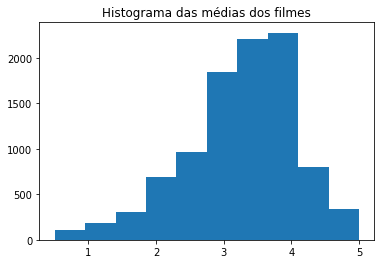

In [59]:
#importando matplotlib 
import matplotlib.pyplot as plt

#plotando histograma
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

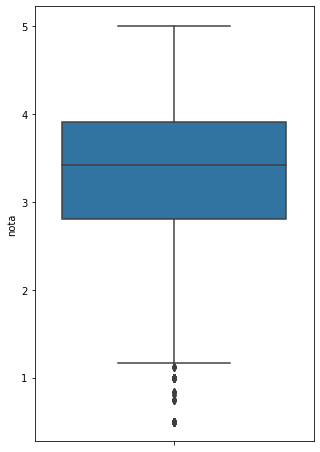

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8)) #redimensiona o boxplot 
sns.boxplot(y=medias_por_filme)

Arquivo tmdb movies

In [ ]:
import pandas as pd

tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

# saber todas as linguas faladas nos filmes, de modo que retornem valores únicos das línguas

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# variável qualitativa categórica nominal
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# 1 grau, 2 grau , 3 grau - variáveis qualitativa categóricas ordinais (existe uma ordem)
# budget - orçamento - variável quantitativa contínua 
# qtde de votos - 1, 2, 3, 4.. - não tem 3,5 votos porque não tem 1,5 pessoa. 

In [ ]:
tmdb.vote_average.unique()

# deixar as notas como únicas - função unique 

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [ ]:
tmdb["original_language"]

# obs: para referenciar uma coluna você pode escrever tanto tmdb.coluna ou tmdb["coluna"]. 
# o ponto pode prejudicar, pois podem existir colunas com nomes restritos 

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [ ]:
# contar quantas vezes cada língua aparece
# o resultado é uma SÉRIE 

tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [ ]:
tmdb["original_language"].value_counts().index

# ÍNDICE: en, fr, es, zh...

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [ ]:
tmdb["original_language"].value_counts().values

# VALORES: contando valores dos idiomas de filmes 

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
# transformando a série em dataframe

tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [ ]:
tmdb["original_language"].value_counts().to_frame().reset_index()

# contando os valores da coluna original_language e 
# transformando o df em duas colunas com índice sendo uma delas 

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [ ]:
# renomeando as colunas index e original_language

contagem_de_linguas = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [ ]:
total_por_linguas = tmdb["original_language"].value_counts()
total_geral = total_por_linguas.sum()
total_de_ingles = total_por_linguas.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

# comparando filmes em inglês com as outras linguagens

4505 298


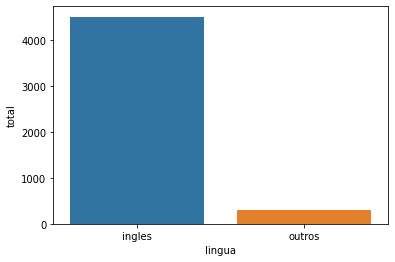

In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x = "lingua", y = "total", data = dados)

In [ ]:
total_por_linguas_de_outros_filmes = tmdb.query("original_language != 'en' ").original_language.value_counts()
total_por_linguas_de_outros_filmes
# consulta de filmes onde o idioma não é inglês
# obs: esta série de idiomas já mostra a ordem dos filmes no qual será utilizado no gráfico a seguir 


fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

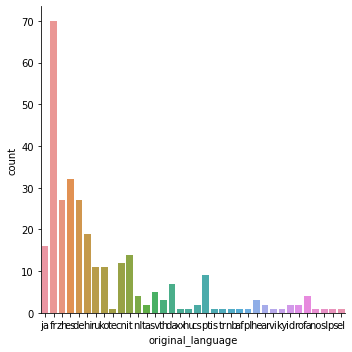

In [ ]:
sns.catplot(x = "original_language", kind = "count", data = filmes_sem_lingua_original_em_ingles)

#para mostrar que este gráfico está com informações, porém está bagunçado e de difícil compreensão

Montando uma query - outras linguagens (sem linguagem inglês)

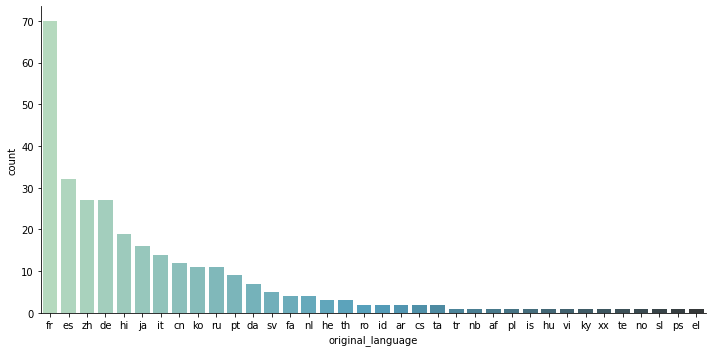

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind = "count", 
            data = filmes_sem_lingua_original_em_ingles,
            aspect = 2, 
            palette = "GnBu_d",
            order = total_por_linguas_de_outros_filmes.index)
# o gráfico seguinte (cor padrão) está melhor para análise 
# documentação Seaborn - ordem, aspecto, paleta de cores para categorias
# catplot = gerar o gráfico de barras
# original_language como eixo x  
# data = fonte dos dados
# kind = "count" -> contagem de valores
# aspect = redimensionar o gráfico 
# order = ordem do index 

##**MÉDIA, MEDIANA, MEDIDAS DE TENDÊNCIA CENTRAL, DISPERSÃO, DESVIO PADRÃO, BOX PLOT e HISTOGRAMA**

In [12]:
filmes.head(2)

# head 2 para olhar os 2 primeiros elementos 

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [18]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
notas_toy_story = notas.query("filmeID==1")
notas_jumanji = notas.query("filmeID==2")
print(len(notas_toy_story), len(notas_jumanji)) #len = quantas notas há de cada filme

215 110


In [31]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.mean())

# MÉDIA das notas dos filmes Toy Story e Jumanji
# 2 casas decimais. 
# OBS: colocar a coluna "nota" antes da média, senão ele dará a média de todas as colunas e só queremos a média de notas

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [76]:
print("Nota mediana do Toy Story %.2f" % notas_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_jumanji.nota.median())

# MEDIANA das notas dos filmes Toy Story e Jumanji

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [43]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

# append junta os parâmetros decididos
# array do numpy 
# exemplo: notas hipotéticas dos filmes 

In [77]:
print(filme1.mean(), filme2.mean()) #média dos filmes f1 e f2 
print(np.std(filme1), np.std(filme2)) #desvio padrão f1 e f2
print(np.median(filme1), np.median(filme2)) #mediana dos  f1 e f2 #numpy vc chama as variáveis na mediana

# numpy 

3.0 3.0
0.5 2.0
3.0 3.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


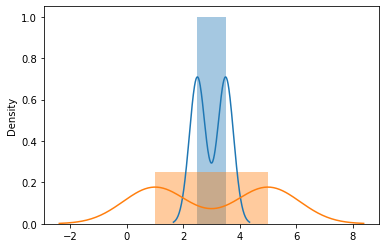

In [50]:
sns.distplot(filme1) #azul
sns.distplot(filme2) #laranja

# distplot = gráfico de distribuição na variação de dados seaborn

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

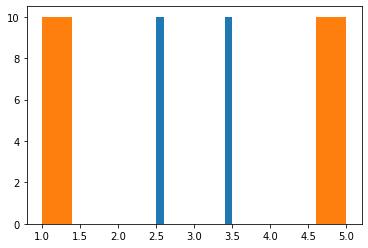

In [61]:
plt.hist(filme1)
plt.hist(filme2)

# matplotlib

{'whiskers': [<matplotlib.lines.Line2D at 0x7f525904bd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5259055400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f525904b9a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5259055ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5259055dc0>,
 'means': []}

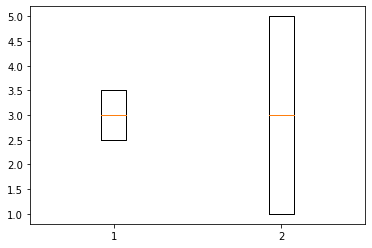

In [63]:
plt.boxplot([filme1, filme2])

#boxplot para cada filme - matplotlib


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5258c11670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5258c11d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5258c11310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5258c1c430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5258c1c730>,
 'means': []}

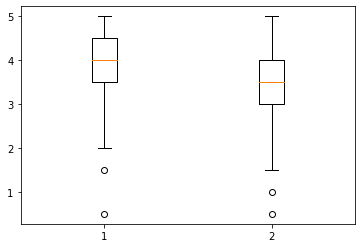

In [95]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

# array com as notas que queremos plotar, notas do filme1 e do filme2 

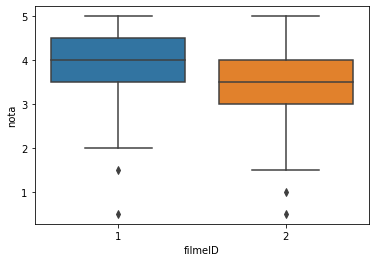

In [72]:
sns.boxplot(x = "filmeID", y = "nota", data = notas.query("filmeID in [1,2]"))

#boxplot do filme 1 e do filme 2 separadamente -> seaborn

In [80]:
# desvio padrão = o quanto os dados "fogem" de uma tendência central 
print("DP Nota Toy Story", notas_toy_story.nota.std(), "DP Nota Jumanji", notas_jumanji.nota.std())

DP Nota Toy Story 0.8348591407114047 DP Nota Jumanji 0.8817134921476455
